## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [332]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [333]:
df=pd.read_csv('ab_data.csv')

In [334]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [335]:
# the number of rows is:
num_rows = df.shape[0]

c. The number of unique users in the dataset.

In [336]:
# the number of unique users

num_uniques = df.nunique()['user_id']
print(num_uniques)

290584


d. The proportion of users converted.

In [337]:
# calculation of the converted ratio
rate_conv = df[df['converted']==1]['converted'].sum()/num_rows
print(rate_conv)

0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [338]:
# what a tricky question!
# they do not line up if both are not equal!
# this can be misleading!

aligned = df[((df['group']=='treatment')== (df['landing_page']=='new_page'))==False].count()[0]
print(aligned)


3893


f. Do any of the rows have missing values?

In [339]:
# the missing values are found by the method .isna()

df.isna().sum()
# The answer is No!

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [340]:
df2 = df.copy()

In [341]:
# deletando as linhas quando 'group'=='treatment'
aligned = df2[((df2['group']=='treatment')== (df2['landing_page']=='new_page'))==False].index.tolist()
#display(aligned)
df2.drop(df2[((df2['group']=='treatment')== (df2['landing_page']=='new_page'))==False].index,inplace=True)

In [342]:
# deletando as outras quando 'group' == 'treatment'
aligned = df2[((df2['group']=='control')== (df2['landing_page']=='old_page'))==False].index.tolist()
#display(aligned)
df2.drop(df2[((df2['group']=='control')== (df2['landing_page']=='old_page'))==False].index,inplace=True)

In [343]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [344]:
# the number of unique values and the number of 'user_id' values

print('The number of unique values in df2 is equal to {0}'.format(df2.nunique()['user_id']))
print("The number of values in df2['user_id'] is equal to {0}".format(df2['user_id'].count()))


The number of unique values in df2 is equal to 290584
The number of values in df2['user_id'] is equal to 290585


b. There is one **user_id** repeated in **df2**.  What is it?

In [345]:
# the duplicated value in the 'user_id' column!
# it can be found by using the function .value_counts()

list_dup=df2['user_id'].value_counts()
print(list_dup.index.tolist()[0])


773192


c. What is the row information for the repeat **user_id**? 

In [346]:
# it can be found by some kind of DataFrame Filtering!

print(df2['user_id'][df2['user_id']==773192])


1899    773192
2893    773192
Name: user_id, dtype: int64


In [347]:
# the duplicated values are with the indexes 1899 and 1893!
# the info about this about this duplicated row is given below

print(("The value of column 'landing_page' is {0}").format(df2['landing_page'][2893]))
print(("The value of column 'group' is {0}").format(df2['group'][2893]))
print(("The value of column 'converted' is {0}").format(df2['converted'][2893]))



The value of column 'landing_page' is new_page
The value of column 'group' is treatment
The value of column 'converted' is 0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [348]:
# the method drop must be called in this situation
# the change must be inplace in order to keep the change permanently

#df2.drop(index=2893,inplace=True)
df2.drop_duplicates()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [294]:
# verifying the deletion of the duplicate!
# There are no more duplicated values
df2['user_id'].value_counts()

630732    1
793302    1
840399    1
797392    1
795345    1
801490    1
799443    1
787157    1
811737    1
836301    1
817882    1
815835    1
805596    1
803549    1
809694    1
807647    1
842446    1
838348    1
922263    1
828097    1
942745    1
936604    1
934557    1
940702    1
938655    1
830144    1
834242    1
848587    1
832195    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [295]:
# the converted rate can be calculated in the following way!
conv_rate = df2['converted'].sum()/len(df2['converted'])

print(conv_rate)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [297]:
# same calculation as in a) but must specify that 'group'=='control'
cont_conv = df2[df2.group=='control']['converted'].sum()/len(df2[df2.group=='control'])

print(cont_conv)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [298]:
# same calculation as in a) but must specify that 'group'=='treatment'
treat_conv = df2[df2.group=='treatment']['converted'].sum()/len(df2[df2.group=='treatment'])
treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [300]:
# this can be calculated in the following way
prob_newpage = df2[df2.landing_page=='new_page']['landing_page'].count()/len(df2)

print(prob_newpage)

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [302]:
prob_oldpage = df2[df2.landing_page=='old_page']['landing_page'].count()/len(df2)
print(prob_oldpage)

0.4999380557773312


**Your answer goes here.**
Uma vez que a taxa de conversão para a página nova é menor (ligeiramente menor, mas mesmo assim é menor) do que para a página antiga, não há evidência suficiente para dizer que a nova página leva a mais conversões!

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


1)$H_0$: Null Hypothesis $\rightarrow$ $p_{old} -p_{new} >= 0 $

2)$H_1$: Alternative Hypothesis $\rightarrow$ $p_{old} -p_{new} < 0$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [303]:
# It is simply given by the convertion rate previously calculated

conv_rate

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [304]:
# Since we are under the null, It is simply given by the convertion rate 
# given in a)

conv_rate

0.11959708724499628

c. What is $n_{new}$?

In [305]:
# the number of times new_page arises can be calculated the count() method!

n_new = df2[df2.landing_page=='new_page']['landing_page'].count()
n_new

145310

d. What is $n_{old}$?

In [306]:
# the number of times old_page arises can be calculated the count() method!

n_old = df2[df2.landing_page=='old_page']['landing_page'].count()
n_old 

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [307]:
# simulating by creating a sample!

b_samp = df2.sample(n_new, replace=True)
newpage_df = newpage_samp.query('group == "treatment"')
newpage_ctr =newpage_df['converted'].mean()

newpage_ctr

0.12045620463091779

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [308]:
# using the same sample as in a) but accounting for the old_page

oldpage_df = b_samp.query('group == "control"')
oldpage_ctr =oldpage_df['converted'].mean()

oldpage_ctr

0.12128968335879123

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [180]:
newpage_ctr - oldpage_ctr

-5.2508672404597e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [309]:
# let us make a standard method of bootstraping!

diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    oldpage_df = b_samp.query('group == "control"')
    newpage_df = b_samp.query('group == "treatment"')
    oldpage_ctr = oldpage_df['converted'].mean()
    newpage_ctr = newpage_df['converted'].mean()
    diffs.append(newpage_ctr - oldpage_ctr)
    


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

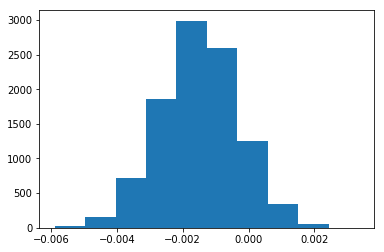

In [325]:
# converting to an array and plotting a histogram

diffs = np.array(diffs)
plt.hist(diffs);

# the curve is right skewed!

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [311]:
# this can be easily calculated

p_diffs = diffs
(p_diffs > conv_rate).mean()

0.0

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The value obtained in $j$ is the p-value.
A p-value of 0.0, which is less than $\alpha=0.05$ means that the we can reject the null hypothesis; then there is a statistical difference between new and old pages (new is better).


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [319]:
# importing statsmodels and aliasing!
import statsmodels.api as sm

convert_old = int(conv_rate*n_old)
convert_new = int(conv_rate*n_new)
print('Number of old {0} and {1} new converted'.format(convert_old,convert_new))

Number of old 17374 and 17378 new converted


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [322]:
z_score, p_value = sm.stats.proportions_ztest( [convert_old,convert_new],[ n_old,n_new])

print(z_score)
print(p_value)
from scipy.stats import norm

print(norm.cdf(z_score))
print(norm.ppf(1-(0.05/2)))


0.0017458087570235473
0.9986070468542415
0.5006964765728793
1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
Since the z-score of 0.0017 does not exceed the critical value of 1.959, we reject the null hypothesis, and the old page is slightly worse than the new one.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
It must be the logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [388]:
df_reg = df2.copy()
df['user_id'].value_counts()
# resetting the indexes to have compatibility
df_reg.reset_index(inplace=True)


In [389]:
import statsmodels.api as sm

df_reg['intercept'] = 1
df_reg[['old_page', 'new_page',]] = pd.get_dummies(df_reg['landing_page'])
listab=[]
listuser=[]
for i in range(len(df_reg['group'])):
#    print(i)
    listuser.append(df_reg['user_id'][i])
    if(df_reg['group'][i]=='treatment'):    
        listab.append(1)
    elif(df_reg['group'][i]=='control'):    
        listab.append(0)
#df_ab=pd.DataFrame([listab,listuser],columns=['ab_page','user_id'])
df_ab=pd.DataFrame({'ab_page':listab,'user_id':listuser})
#df.append(df_ab,ignore_index=True)        
df_reg = df_reg.merge(df_ab,on='user_id')
df_reg.drop(['old_page'],axis=1,inplace=True)
df_reg.head()


,index,user_id,timestamp,group,landing_page,converted,intercept,new_page,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [391]:
# using a standard method to fit a logistic regression!

logit_mod = sm.Logit(df_reg['converted'], df_reg[['ab_page','new_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [392]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290585
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Jan 2019   Pseudo R-squ.:               8.102e-06
Time:                        08:54:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1892
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -2.0038      0.008   -247.149      0.000      -2.020      -1.988
new_page      -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

The hypotheses for part II are:

1)$H_0$: Null Hypothesis $\rightarrow$ $p_{old} -p_{new} >= 0 $

2)$H_1$: Alternative Hypothesis $\rightarrow$ $p_{old} -p_{new} < 0$

while in the Logistic Regression:

1)$H_0$: Null Hypothesis $\rightarrow$ $p_{old} -p_{new} = 0 $

2)$H_1$: Alternative Hypothesis $\rightarrow$ $p_{old} -p_{new} \neq 0$

For the Logistic the p_value is equal to zero therefore we reject the null and there is a statistical significant difference between the old and new pages, in accordance with what is hypothesized in part II. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
    É uma boa ideia considerar outros termos sim no modelo, como outras variáveis ou até interações. Isso pode levar a uma melhora do $\chi^2$ do modelo, somente temos que tomar cuidado com o overfitting.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [393]:
countries_df = pd.read_csv('./countries.csv')
#df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new = countries_df.set_index('user_id').join(df_reg.set_index('user_id'), how='inner')



In [394]:
### Create the necessary dummy variables
df_new['country'].value_counts()

US    203622
UK     72466
CA     14499
Name: country, dtype: int64

In [395]:
df_reg2=df_new.copy()

In [396]:
# getting the dummy variables
df_reg2[['US','UK','CA',]]=pd.get_dummies(df_reg2['country'])

In [397]:
#visualizing the DataFrame

df_reg2

,country,index,timestamp,group,landing_page,converted,intercept,new_page,ab_page,US,UK,CA
user_id,,,,,,,,,,,,
630000,US,63114,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,103873,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,205236,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,0,1
630003,US,247344,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,242283,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1
630005,US,77834,2017-01-17 21:22:25.940766,treatment,new_page,1,1,0,1,0,0,1
630006,US,241631,2017-01-14 05:13:51.962356,treatment,new_page,0,1,0,1,0,0,1
630008,US,159053,2017-01-11 16:11:11.131461,control,old_page,0,1,1,0,0,0,1
630009,US,196137,2017-01-05 23:35:15.820565,control,old_page,1,1,1,0,0,0,1


In [398]:
# comparing fitting results directly to US, we need to drop that column!

df_reg2.drop(['US'],axis=1,inplace=True)

In [399]:
logit_mod = sm.Logit(df_reg2['converted'], df_reg2[['ab_page','new_page','UK','CA']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


In [400]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Jan 2019   Pseudo R-squ.:               2.326e-05
Time:                        08:55:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -2.0450      0.027    -76.820      0.000      -2.097      -1.993
new_page      -2.0300      0.027    -76.248      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.075      -0.005       0.106
CA             0.0407      0.027      1.515      0.130      -0.012       0.093
==============================================================================
"""

In [401]:
results.params
#coefficient of ab_page
print(1/np.exp(results.params[0]),'ab_page')
#coefficient of new_page
print(1/np.exp(results.params[1]),'new_page')

#coefficient of UK
print(1/np.exp(results.params[2]),'UK')
#coefficient of CA
print(1/np.exp(results.params[3]),'CA')


7.729031654035243 ab_page
7.614214248113634 new_page
0.9506206942873626 UK
0.9600784387941228 CA



    Os coeficientes para country são cerca de 8 vezes menores do que par ab_page e new_page, mas ainda assim tem que ser levados em conta.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [379]:
### Fit Your Linear Model And Obtain the Results

In [402]:
#df_reg2['inter_country_page'] = df_reg2['country']*df_reg2['ab_page']
#df_reg2.drop(['inter_country_page'],axis=1,inplace=True)
df_reg2['inter_uk_page'] = df_reg2['UK']*df_reg2['ab_page']
df_reg2['inter_ca_page'] = df_reg2['CA']*df_reg2['ab_page']


In [403]:
df_reg2.head()

,country,index,timestamp,group,landing_page,converted,intercept,new_page,ab_page,UK,CA,inter_uk_page,inter_ca_page
user_id,,,,,,,,,,,,,
630000,US,63114,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,1,0,1
630001,US,103873,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,1,0,1
630002,US,205236,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1,0,0
630003,US,247344,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,1,0,1
630004,US,242283,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,1,0,1


In [404]:
# Fitting the Logistic Regression


logit_mod = sm.Logit(df_reg2['converted'], df_reg2[['ab_page','new_page','UK','CA','inter_uk_page','inter_ca_page']])
results = logit_mod.fit()



Optimization terminated successfully.
         Current function value: 0.366106
         Iterations 6


In [405]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Jan 2019   Pseudo R-squ.:               3.485e-05
Time:                        08:56:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1915
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ab_page          -2.0715      0.037    -55.798      0.000      -2.144      -1.999
new_page         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK                0.0118      0.040      0.296      0.767      -0.066       0.090
CA                0.0175      0.038      0.465      0.642      -0.056       0.091
inter_uk_page     0.0783      0.057      1.378      0.168      -0.033       0.190
inter_ca_page     0.0469      0.054      0.871      0.384      -0.059       0.152
=================================================================================
"""

In [406]:
results.params
#coefficient of ab_page
print(1/np.exp(results.params[0]),'ab_page')
#coefficient of new_page
print(1/np.exp(results.params[1]),'new_page')

#coefficient of UK
print(1/np.exp(results.params[2]),'UK')
#coefficient of CA
print(1/np.exp(results.params[3]),'CA')

#coefficient of interaction with UK
print(1/np.exp(results.params[4]),'inter with UK')
#coefficient of interaction with CA
print(1/np.exp(results.params[5]),'inter with CA')



7.936352509179853 ab_page
7.418713450292299 new_page
0.9882853316798338 UK
0.982624898478864 CA
0.9247032894308135 inter with UK
0.9542294083505973 inter with CA



    Como os coeficientes de interação entre UK, CA e ab_page são cerca de 8 vezes menores do que os de primeira ordem, eles tem pouca influência, mas são consideráveis. A inclusão da interação é importante para que consigamos uma generalização do modelo. 



<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.